In [6]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)


In [2]:
#NULL & ALTERNATIVE

In [3]:
#Testing whether or not Mendel's model is good:
    #Large values of distance (tvd) favour the alternative

In [30]:
#Therefore start at the observed distance and look to the right

In [ ]:
############################################################

In [ ]:
############################################################

In [31]:
#If the tail(after red dot) area is SMALL, then you are far out into the tail
#If the tail(after red dot) is SMALL, then the data are not consistent with the null

In [ ]:
#########################################################3

In [5]:
mendel_proportions = [0.75, .25]

In [6]:
#Mendel's data

sample_size = 929
observed_count = 705   #Purple flowering
observed_percent = 100 * observed_count / sample_size

In [17]:
observed_distance = abs(observed_percent - 75)
observed_distance

0.8880516684607045

In [7]:
observed_percent

75.8880516684607

## Predicting the Test Statistic Under the Null 

In [8]:
#Simulate one value of the test statistic
#Under the null hypothesis

def one_simulated_distance():
    sample_percent = 100 * sample_proportions(sample_size, mendel_proportions)[0]
    return abs(sample_percent - 75)

In [9]:
one_simulated_distance()

1.7491926803014053

In [10]:
num_simulations = 10000
distances = make_array()

for i in np.arange(num_simulations):
    distances = np.append(distances, one_simulated_distance())

In [11]:
mendel_simulations = Table().with_columns('Distance between sample % and 75%', distances)

Text(0.5, 1.0, 'Prediction Made by the Null Hypothesis')

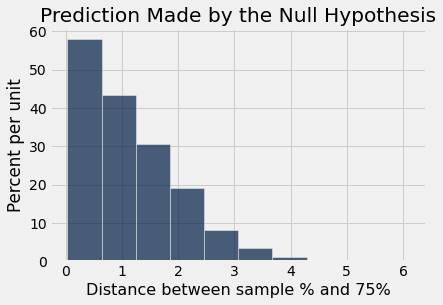

In [15]:
mendel_simulations.hist()
plt.title('Prediction Made by the Null Hypothesis')

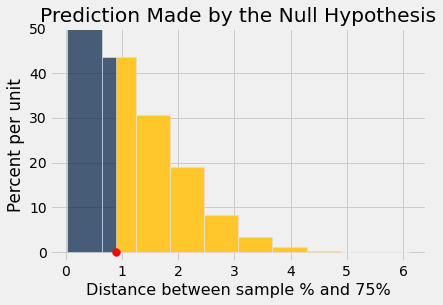

In [46]:
mendel_simulations.hist(left_end = observed_distance)
plt.ylim(-0.02, 0.5)
plt.title('Prediction Made by the Null Hypothesis')
plt.scatter(observed_distance, 0, color='red', s=60, zorder=3)

In [29]:
#Get the tail (after red dot) area (as a proportion)

np.count_nonzero(distances >= observed_distance)/num_simulations

0.5387

## p-value

In [33]:
#p-value is a chance

In [34]:
#p-value
    #under the null
    #that the test statistic
    #is equal to the value observed in the data
    #is even further in the direction of the alternative


## How Far is Too Far?

### Suppose you decide to use the 5% cutoff

In [40]:
np.count_nonzero(distances >= 3)/num_simulations

0.035

In [41]:
np.count_nonzero(distances >= 2.9)/num_simulations

0.0424

In [42]:
np.count_nonzero(distances >= 2.8)/num_simulations

0.0503

In [44]:
np.count_nonzero(distances >= 2.75)/num_simulations

0.0542

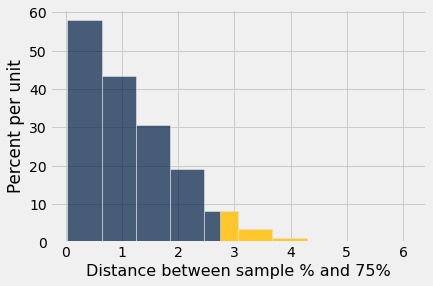

In [48]:
cutoff_5_percent = 2.75
mendel_simulations.hist(left_end = cutoff_5_percent)

In [1]:
#A/B Testing

In [2]:
 #COMPARING TWO GROUPS
    #Treatment group and control group

In [9]:
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [13]:
smoking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')

In [12]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


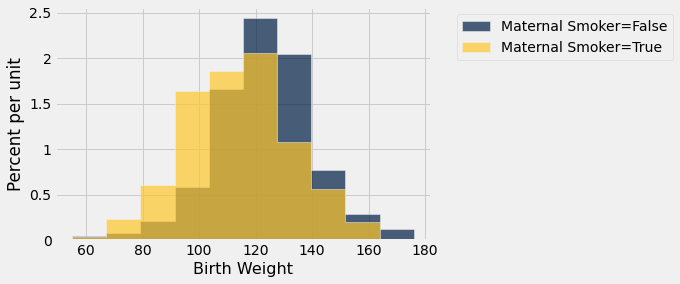

In [14]:
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

In [ ]:
#GROUP A : Smokers
#GROUP B : non-smokers
#TEST STATISTIC?
#One number that summarizes all weights of smoker & non smoker babies.

#Mean of (smoke babies)
#Mean of (non-smoke babies)
#= two numbers.

#We need one.
#Take Mean_weightB - Mean_weightA

#If large, weight of non-smoker babies is large!
#= LARGE values favour the alternative